In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train = train.set_index('id')
train

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
id,,,,,,,,,
0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,27,69,65,Sandy,Millets,30,6,18,28-28
2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,35,58,43,Red,Paddy,37,2,16,DAP
...,...,...,...,...,...,...,...,...,...
749995,25,69,30,Clayey,Maize,8,16,6,28-28
749996,37,64,58,Loamy,Sugarcane,38,8,20,17-17-17
749997,35,68,59,Sandy,Ground Nuts,6,11,29,10-26-26


In [2]:
print(f"Train dataset has {train.shape[0]} rows.")
print(f"Test dataset has {test.shape[0]} rows.")

Train dataset has 750000 rows.
Test dataset has 250000 rows.


# Data Visualization:

In [3]:
target = train.columns[-1]  # Assuming the last column is the target variable
num_features = [col for col in train.select_dtypes(exclude='object').columns if col != target]
cat_features = [col for col in train.select_dtypes(include='object').columns if col != target]
print("Numerical features:", num_features)
print("Categorical features:", cat_features)
print("Target column:", target)

Numerical features: ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']
Categorical features: ['Soil Type', 'Crop Type']
Target column: Fertilizer Name


## Mutual Information:

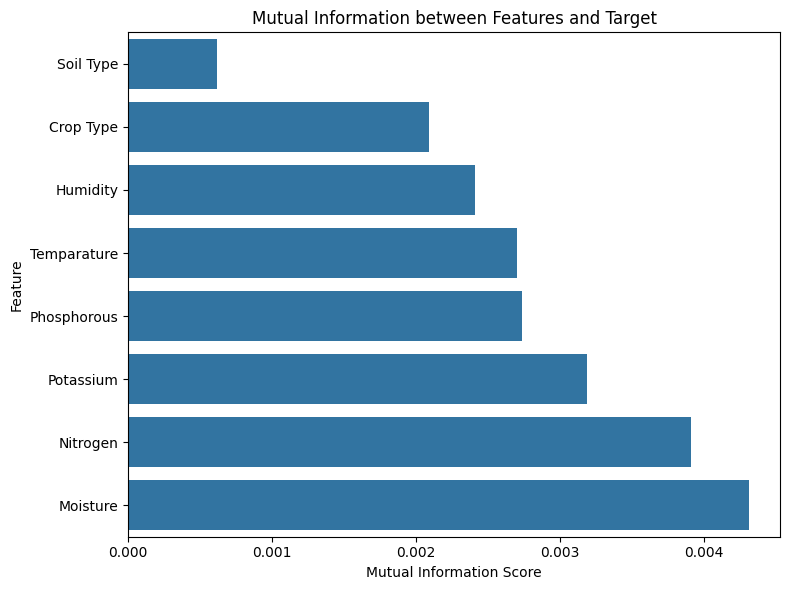

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif


# Copy the original data
X = train[num_features + cat_features].copy()

# Encode categorical features
for col in cat_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Target
y = train[target]

# Build discrete_features mask (True for categorical columns)
discrete_mask = [col in cat_features for col in X.columns]

# Calculate mutual information
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_mask, random_state=0)

# Sort and plot
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

mi_df = pd.Series(mi_scores, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(8, 6))
sns.barplot(x=mi_df.values, y=mi_df.index, orient='h')
plt.title('Mutual Information between Features and Target')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## Categorical Features:

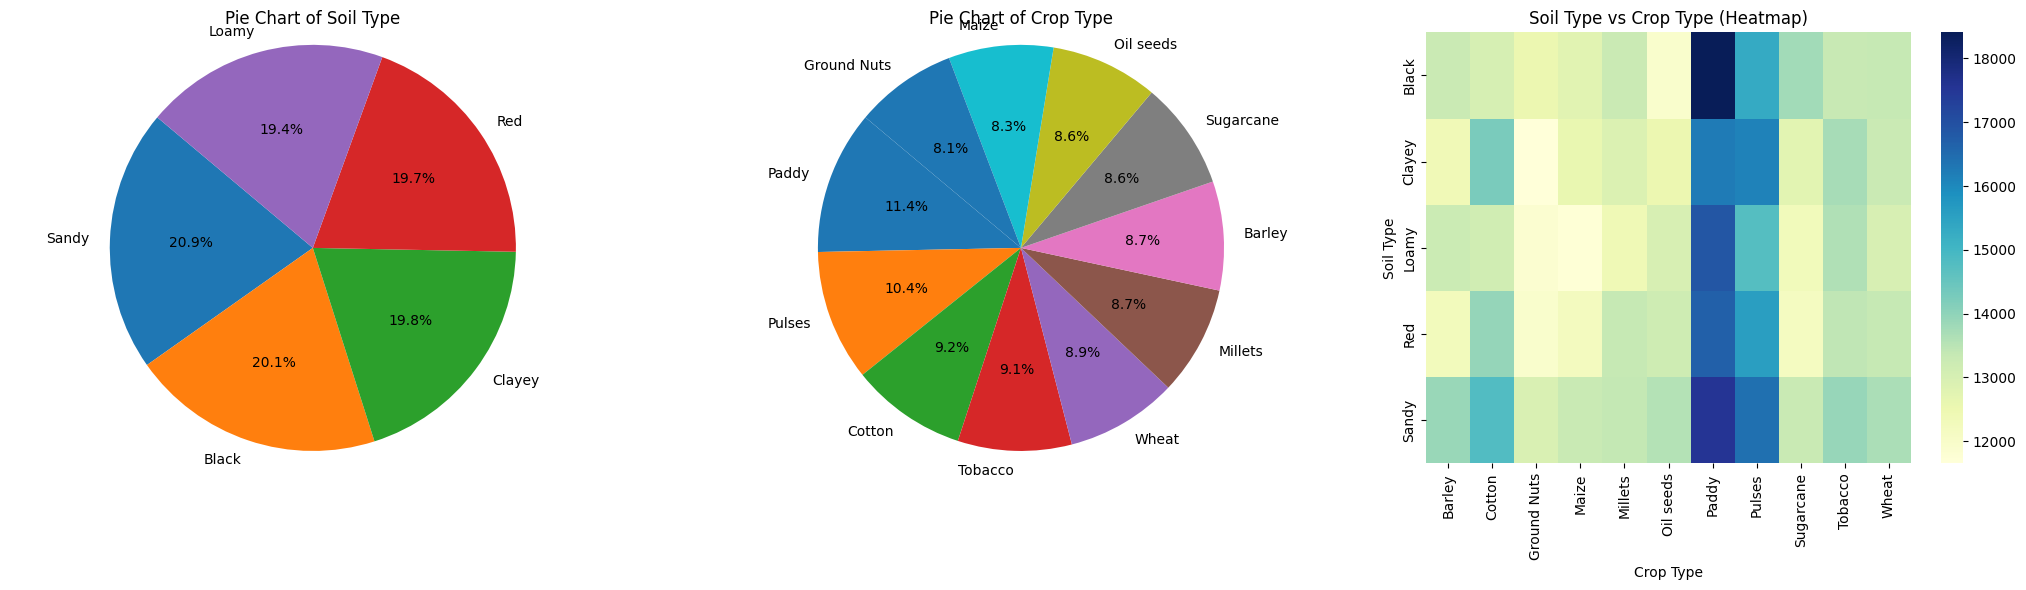

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

# Pie charts for categorical features
for i, col in enumerate(cat_features):
    value_counts = train[col].value_counts()
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Pie Chart of {col}')
    axes[i].axis('equal')

cross_tab = pd.crosstab(train[cat_features[0]], train[cat_features[1]])

# Heatmap for relationship between two categorical features
sns.heatmap(cross_tab, ax=axes[2], cmap='YlGnBu', cbar=True)
axes[2].set_title(f'{cat_features[0]} vs {cat_features[1]} (Heatmap)')
axes[2].set_xlabel(cat_features[1])
axes[2].set_ylabel(cat_features[0])

plt.tight_layout()
plt.show()


## Numerical Features:

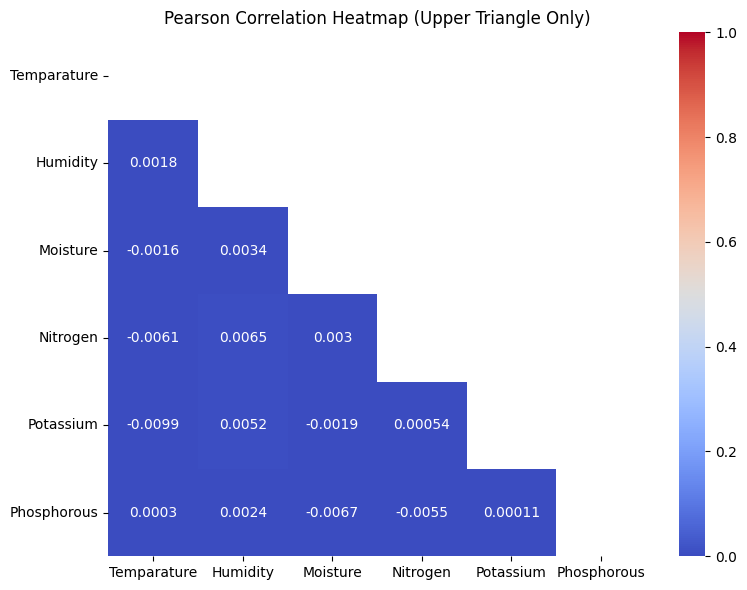

In [9]:
# Compute Pearson correlation for numerical features
pearson_corr = train[num_features].corr(method='pearson')

fig_corr, ax_corr = plt.subplots(figsize=(8, 6))

# Mask for the lower triangle
mask = np.triu(np.ones_like(pearson_corr, dtype=bool))

sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', mask=mask, ax=ax_corr, vmin=0, vmax=1)
ax_corr.set_title('Pearson Correlation Heatmap (Upper Triangle Only)')

plt.tight_layout()
plt.show()

In [28]:
def add_npk_and_percentages(df, num_features):
    # Sum the last 3 columns in num_features to create NPK
    last3 = num_features[-3:]
    df['NPK'] = df[last3].sum(axis=1)
    # Calculate percentage for each last 3 column
    for col in last3:
        df[f'{col}_pct'] = df[col] / df['NPK'] * 100
    return df

# Example usage:
train = add_npk_and_percentages(train, num_features)
train.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,NPK,Nitrogen_pct,Potassium_pct,Phosphorous_pct
id,,,,,,,,,,,,,
0,37,70,36,Clayey,Sugarcane,36,4,5,28-28,45,80.000000,8.888889,11.111111
1,27,69,65,Sandy,Millets,30,6,18,28-28,54,55.555556,11.111111,33.333333
2,29,63,32,Sandy,Millets,24,12,16,17-17-17,52,46.153846,23.076923,30.769231
3,35,62,54,Sandy,Barley,39,12,4,10-26-26,55,70.909091,21.818182,7.272727
4,35,58,43,Red,Paddy,37,2,16,DAP,55,67.272727,3.636364,29.090909


In [31]:
train['Fertilizer Name'].unique()

array(['28-28', '17-17-17', '10-26-26', 'DAP', '20-20', '14-35-14',
       'Urea'], dtype=object)